<a href="https://colab.research.google.com/github/antonsysoev/ktmi_pm/blob/main/NN_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
install.packages("mltools")
library(mltools)

install.packages("neuralnet")
library(neuralnet)

install.packages('caret')
library(caret)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/mltools_0.3.5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 32471 bytes (31 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

1. Начнем с создания набора данных. Установим seed на 42, сгенерируем 200 случайных точек между -10 и 10 и сохраним их в векторе с именем X. Затем создадим вектор с именем Y, содержащий значение sin(x). Нейронные сети гораздо более гибкие, чем большинство алгоритмов регрессии, и могут с легкостью подгонять сложные функции. Самая большая сложность заключается в том, чтобы найти подходящую структуру сети, соответствующую ситуации.

In [4]:
%%R
set.seed(42)

X = runif(200,-10,10)
Y = sin(X)
print(X)
print(Y)

  [1]  8.2961209  8.7415083 -4.2772093  6.6089525  2.8349104  0.3819190
  [7]  4.7317663 -7.3066681  3.1398458  4.1012957 -0.8451645  4.3822450
 [13]  8.6934449 -4.8914235 -0.7541435  8.8002905  9.5645286 -7.6502528
 [19] -0.5000584  1.2066549  8.0806277 -7.2257966  9.7778346  8.9333647
 [25] -8.3512488  0.2842357 -2.1959307  8.1147626 -1.0606074  6.7200852
 [31]  4.7519124  6.2211028 -2.2378343  3.7033946 -9.9210332  6.6583216
 [37] -9.8533171 -5.8468205  8.1320282  2.2355729 -2.4088152 -1.2845683
 [43] -9.2513793  9.4707983 -1.3649750  9.1515319  7.7550981  2.7995754
 [49]  9.4193322  2.3767641 -3.3314558 -3.0650350 -2.0302918  5.6938555
 [55] -9.2212702  4.9759077  3.5455366 -6.5747134 -4.7782407  0.2882587
 [61]  3.5121455  9.6563440  5.1908854  1.3297685  6.9937944 -6.2105213
 [67] -4.5742677  6.5631697  3.8640964 -5.1891052 -9.1402241 -7.1904181
 [73] -5.6722917 -0.4120287 -6.0517932  4.3871168 -9.8423052 -2.4902007
 [79]  0.2881542 -9.9685889  1.6320801 -6.8418958 -2.8194339  2.

2. Сеть состоит из трех компонентов: сети нейронов, веса каждой связи между нейронами и функции активации каждого нейрона. Будем использовать логистическую функцию активации, что является настройкой по умолчанию для пакета nnet. Мы берем одно число в качестве входа нашей нейронной сети и хотим получить одно число в качестве выхода, поэтому размер входного и выходного слоя равен единице. Для скрытого слоя мы начнем с трех нейронов. Хорошей практикой является рандомизация начальных весов, поэтому создадим вектор из 10 случайных значений, выбранных в интервале [-1,1].

In [5]:
%%R
set.seed(42)

weight = runif(10, -1, 1)
print(weight)

 [1]  0.8296121  0.8741508 -0.4277209  0.6608953  0.2834910  0.0381919
 [7]  0.4731766 -0.7306668  0.3139846  0.4101296


3. Нейронные сети имеют сильную тенденцию к чрезмерной подгонке данных, то есть они становятся действительно хорошими в описании отношений между значениями в вашем наборе данных, но не эффективны с данными, которые не использовались для обучения вашей модели. Как следствие, необходимо провести кросс-валидацию модели. Установите значение seed равным 42, затем создайте обучающий набор, содержащий 75% значений из исходного набора данных, и тестовый набор, содержащий остальные данные.

In [6]:
%%R 
set.seed(42)

trainX = as.matrix(X[1:(length(X)*0.75)]) 
testX = as.matrix(X[(length(X)*0.75+1):(length(X))])

trainY = as.matrix(Y[1:(length(Y)*0.75)]) 
testY = as.matrix(Y[(length(Y)*0.75+1):(length(Y))])

train = data.frame(X=trainX,y=trainY)
test = data.frame(X=testX,y=testY)

4. Загрузите пакет nnet и используйте одноименную функцию для создания модели. Передайте веса через аргумент Wts и установите аргумент maxit равным 50. Мы хотим подобрать функцию, которая может иметь на выходе несколько возможных значений. Для этого установите аргумент linout в true. 

In [25]:
%%R 

model_train = neuralnet(y ~ X, train, constant.weights = weight, hidden = 3)
model_train$net.result

[[1]]
              [,1]
  [1,] -0.06217800
  [2,] -0.06217800
  [3,] -0.16623054
  [4,] -0.06217795
  [5,]  0.22852431
  [6,]  0.40644596
  [7,] -0.06204466
  [8,] -0.16623054
  [9,]  0.03784309
 [10,] -0.06027320
 [11,] -0.16616906
 [12,] -0.06159532
 [13,] -0.06217800
 [14,] -0.16623054
 [15,] -0.16611795
 [16,] -0.06217800
 [17,] -0.06217800
 [18,] -0.16623054
 [19,] -0.16548811
 [20,]  0.94323374
 [21,] -0.06217800
 [22,] -0.16623054
 [23,] -0.06217800
 [24,] -0.06217800
 [25,] -0.16623054
 [26,]  0.27067281
 [27,] -0.16623052
 [28,] -0.06217800
 [29,] -0.16621434
 [30,] -0.06217797
 [31,] -0.06205553
 [32,] -0.06217775
 [33,] -0.16623052
 [34,] -0.05204344
 [35,] -0.16623054
 [36,] -0.06217796
 [37,] -0.16623054
 [38,] -0.16623054
 [39,] -0.06217800
 [40,]  0.81638466
 [41,] -0.16623054
 [42,] -0.16622615
 [43,] -0.16623054
 [44,] -0.06217800
 [45,] -0.16622776
 [46,] -0.06217800
 [47,] -0.06217800
 [48,]  0.26108992
 [49,] -0.06217800
 [50,]  0.70675077
 [51,] -0.16623054
 [52,]

5. Спрогнозируйте выход для тестового набора и вычислите RMSE ваших прогнозов. Постройте график функции sin(x), а затем график ваших прогнозов.

In [26]:
%%R
# функция rmse
rmse_function <- function(predictions, targets) {
  result = matrix(0, nrow=length(predictions), ncol=1, byrow = FALSE)
  for(i in 1:length(predictions)) {
    result[i,1] = ((predictions[i,1] - targets[i,1]) ** 2) / length(predictions)
  }
  return (result)
}

[1] 0.6563122


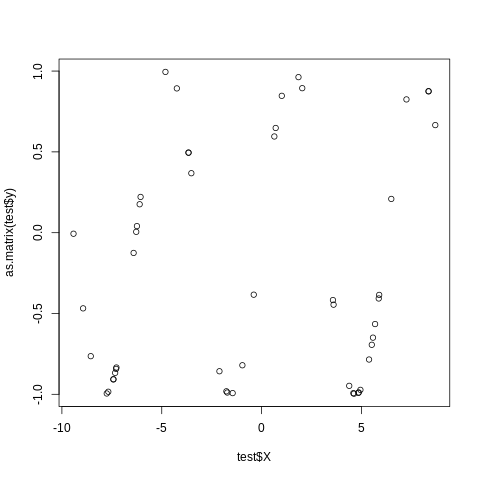

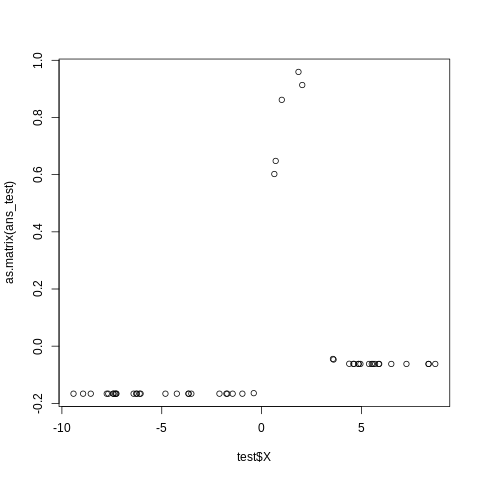

In [27]:
%%R
# прогноз по тестовой выборке
ans_test = compute(model_train, as.data.frame(test$X))$net.result
# вычисление среднеквадратического отклонения предсказанного значения от истинного
#sd_test = rmse_function(as.matrix(test$y), ans_test)
sd_test = rmse(as.matrix(test$y), ans_test)
print(sd_test)

plot(test$X, as.matrix(test$y))
plot(test$X, as.matrix(ans_test))

6. Количество нейронов в скрытом слое, а также количество используемых скрытых слоев оказывает большое влияние на эффективность модели. Повторите упражнения с третьего по пятое, но на этот раз используйте скрытый слой с семью нейронами и инициируйте случайным образом 22 веса.

In [10]:
%%R
set.seed(42)

weight_22 = runif(22, -1, 1)
print(weight_22)

 [1]  0.82961209  0.87415083 -0.42772093  0.66089525  0.28349104  0.03819190
 [7]  0.47317663 -0.73066681  0.31398458  0.41012957 -0.08451645  0.43822450
[13]  0.86934449 -0.48914235 -0.07541435  0.88002905  0.95645286 -0.76502528
[19] -0.05000584  0.12066549  0.80806277 -0.72257966


[1] 0.2523498


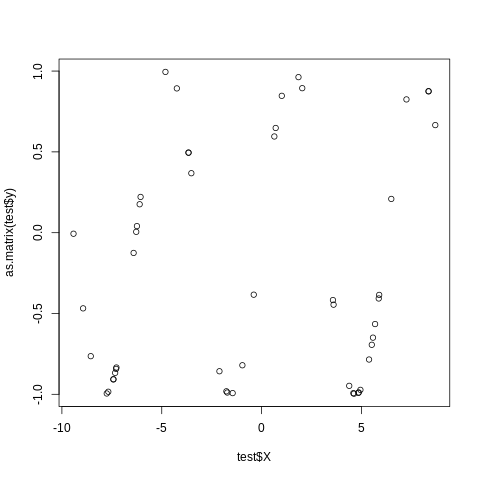

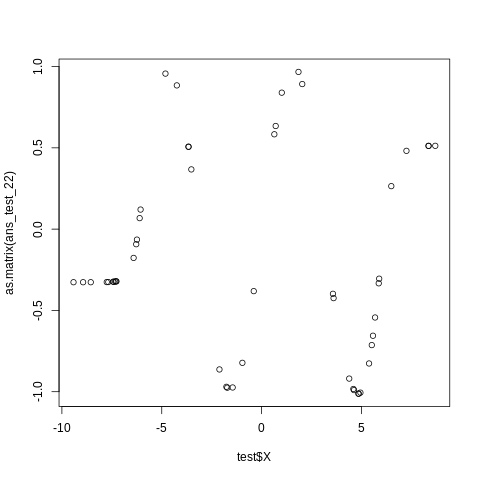

In [11]:
%%R 
model_train_22 = neuralnet(y ~ X, train, constant.weights = weight_22, hidden = 7)
# прогноз по тестовой выборке
ans_test_22 = compute(model_train_22, as.data.frame(test$X))$net.result
# вычисление среднеквадратического отклонения предсказанного значения от истинного
sd_test_22 = rmse(as.matrix(test$y), ans_test_22)
print(sd_test_22)

plot(test$X, as.matrix(test$y))
plot(test$X, as.matrix(ans_test_22))

7. Теперь давайте используем нейронные сети для решения задачи классификации, поэтому давайте загрузим набор данных iris! Хорошей практикой является нормализация входных данных, чтобы унифицировать поведение вашей модели в различных диапазонах значений и ускорить обучение. Нормализуйте каждый фактор так, чтобы его среднее значение было равно нулю, а стандартное отклонение - 1, затем создайте обучающий и тестовый наборы.

In [149]:
%%R

iris_X = iris[, 1:4]
norm_iris = scale(as.matrix(iris_X), center = TRUE, scale = TRUE)
my_iris = iris
my_iris[,1:4] = norm_iris

In [283]:
%%R

trainX_iris = matrix(0, ncol= 4, nrow=round(length(my_iris[,1])*0.75))
testX_iris = matrix(0, ncol = 4, nrow=round(length(my_iris[,1])* 0.25))

trainY_iris = matrix(0, ncol = 1, nrow = round(length(my_iris[,1])*0.75)) 
testY_iris = matrix(0, ncol = 1, nrow=round(length(my_iris[,1])* 0.25))

rand = c(sample(1:length(my_iris[,1]), (length(my_iris[,1])*0.75), replace = FALSE))

for(i in 1:(length(my_iris[,1])*0.75)) {
    trainX_iris[i, 1] = my_iris[rand[i],1]
    trainX_iris[i, 2] = my_iris[rand[i],2]
    trainX_iris[i, 3] = my_iris[rand[i],3]
    trainX_iris[i, 4] = my_iris[rand[i],4]

    trainY_iris[i, 1] = my_iris[rand[i],5]
}
j = 1
for(i in 1:(length(my_iris[,1]))) {
  if(is.element(i, rand) == "FALSE") {
      testX_iris[j, 1] = my_iris[i,1]
      testX_iris[j, 2] = my_iris[i,2]
      testX_iris[j, 3] = my_iris[i,3]
      testX_iris[j, 4] = my_iris[i,4]
      testY_iris[j, 1] = my_iris[i,5]
      j=j+1
  }
}

In [284]:
%%R 

train_iris = data.frame(trainX_iris,trainY_iris)
test_iris = data.frame(testX_iris,testY_iris)

8. Используйте nnet() и используйте скрытый слой из десяти нейронов для создания модели. Мы хотим подогнать функцию, которая имеет конечное значение на выходе. Для этого установите аргумент linout в true. Посмотрите на структуру вашей модели. В задаче классификации выходом обычно является фактор, который кодируется как несколько фиктивных переменных, а не одно числовое значение. Как следствие, выходной слой имеет на один нейрон меньше, чем количество уровней выходного фактора.

clust.model<-nnet(Species~.,size=10,Wts=runif(83, -1, 1),data=clust.train)

In [285]:
%%R 

model_train_83 = neuralnet(trainY_iris ~., train_iris,  constant.weights = runif(83,-1,1), hidden = 10, linear.output = TRUE)

9. Сделайте прогноз на основе значений тестового набора.

In [289]:
%%R
ans_test_83 = as.factor(round(compute(model_train_83, test_iris[,1:4])$net.result))
print(ans_test_83)

 [1] 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 3 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
Levels: 1 2 3


10. Создайте таблицу соответствия (confusion matrix) вашего предсказания и вычислите точность модели.

In [293]:
%%R
confus = confusionMatrix(data=ans_test_83, reference=as.factor(test_iris[,5]))
confus

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3
         1 10  0  0
         2  0 12  0
         3  0  1 15

Overall Statistics
                                          
               Accuracy : 0.9737          
                 95% CI : (0.8619, 0.9993)
    No Information Rate : 0.3947          
    P-Value [Acc > NIR] : 2.707e-14       
                                          
                  Kappa : 0.9599          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            1.0000   0.9231   1.0000
Specificity            1.0000   1.0000   0.9565
Pos Pred Value         1.0000   1.0000   0.9375
Neg Pred Value         1.0000   0.9615   1.0000
Prevalence             0.2632   0.3421   0.3947
Detection Rate         0.2632   0.3158   0.3947
Detection Prevalence   0.2632   0.3158   0.4211
Balanced Accuracy      1.0000   0.9615   0.9783
